In [1]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import csv

warnings.filterwarnings("ignore",message='invalid value encountered in less_equal')

%matplotlib inline

In [2]:
flight = '20150706'

In [3]:
pf1 = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
pf2 = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}

cipFile = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/' + flight + '/' + flight + '_CIPfit-spirals-10s1sAvg.nc'

# Pull out any global variables/attributes from the netcdf file
cipData_root = xr.open_dataset(cipFile)
sprlZone = str(cipData_root.sprlZone.data,'utf-8')
mcsType = str(cipData_root.mcsType.data,'utf-8')
numSprls = len(sprlZone)

# Loop over each spiral for the current flight
for ix in np.arange(0,numSprls):
    # Open the group associated with the current spiral
    cipData = xr.open_dataset(cipFile,group='spiral_' + str(ix+1))

    if ix in [0,1]:
        if ix == 0:
            pf1['tempC'] = cipData.tempC_10s.data
            pf1['rh'] = cipData.rh_10s.data
            pf1['Nt'] = cipData.cipNt_hybrid_igf.data
            pf1['twc'] = cipData.cipTWC_hybrid_igf_mlr.data
            pf1['Dmm'] = cipData.cipDmm_hybrid_igf_mlr.data
            pf1['ar'] = cipData.areaRatio_10s.data
            pf1['re'] = cipData.efctvRadius_10s_mlr.data
            pf1['rjctRatio'] = cipData.rjctRatio_10s.data
        if ix == 1:
            pf2['tempC'] = cipData.tempC_10s.data
            pf2['rh'] = cipData.rh_10s.data
            pf2['Nt'] = cipData.cipNt_hybrid_igf.data
            pf2['twc'] = cipData.cipTWC_hybrid_igf_mlr.data
            pf2['Dmm'] = cipData.cipDmm_hybrid_igf_mlr.data
            pf2['ar'] = cipData.areaRatio_10s.data
            pf2['re'] = cipData.efctvRadius_10s_mlr.data
            pf2['rjctRatio'] = cipData.rjctRatio_10s.data


# Change units as desired for any variables
pf1['re'] = pf1['re']/1000
pf2['re'] = pf2['re']/1000


pf1['Dmm'][pf1['Dmm'] == 0] = np.nan
pf2['Dmm'][pf2['Dmm'] == 0] = np.nan
pf1['Nt'][pf1['Nt'] == 0] = np.nan
pf2['Nt'][pf2['Nt'] == 0] = np.nan
pf1['twc'][pf1['twc'] == 0] = np.nan
pf2['twc'][pf2['twc'] == 0] = np.nan

In [4]:
pf1_temp = pf1['tempC'][(pf1['tempC'] <= -2) & (pf1['tempC'] >= -7)]
Dmm_pf1 = pf1['Dmm'][(pf1['tempC'] <= -2) & (pf1['tempC'] >= -7)]
finiteIx_pf1 = np.isfinite(Dmm_pf1)
pf_Dmm_pf1 = np.poly1d(np.polyfit(pf1_temp[finiteIx_pf1],Dmm_pf1[finiteIx_pf1],  1))
Dmm_pf1_dT = pf_Dmm_pf1(-5) - pf_Dmm_pf1(-6)
        
print(Dmm_pf1_dT*1000)

50.785360498211915


In [58]:
print(np.nanmean(pf1['Dmm'][(pf1['tempC'] <= 0)]))

0.8638059701492538


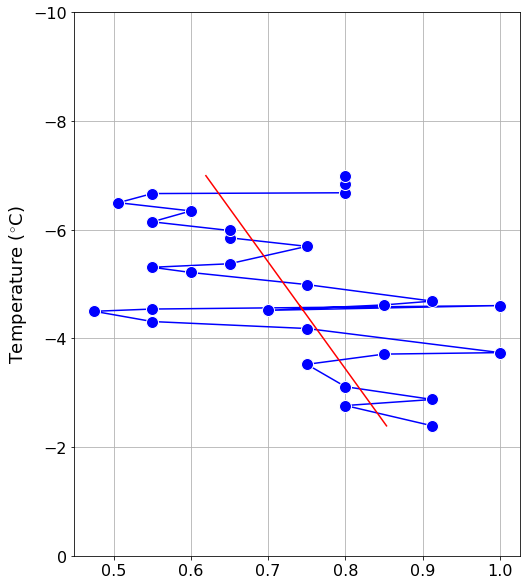

In [6]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(Dmm_pf1[finiteIx_pf1],pf1_temp[finiteIx_pf1],'b-')
ax.plot(Dmm_pf1[finiteIx_pf1],pf1_temp[finiteIx_pf1],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)
ax.plot(pf_Dmm_pf1(pf1_temp[finiteIx_pf1]),pf1_temp[finiteIx_pf1],'r-')

ax.set_ylim(-10,0)
ax.invert_yaxis()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(which='both')

In [54]:
pf2_temp = pf2['tempC'][(pf2['tempC'] <= -5.5) & (pf2['tempC'] >= -8.8)]
Dmm_pf2 = pf2['Dmm'][(pf2['tempC'] <= -5.5) & (pf2['tempC'] >= -8.8)]
finiteIx_pf2 = np.isfinite(Dmm_pf2)
pf_Dmm_pf2 = np.poly1d(np.polyfit(pf2_temp[finiteIx_pf2],Dmm_pf2[finiteIx_pf2],  1))
Dmm_pf2_dT = pf_Dmm_pf2(-5) - pf_Dmm_pf2(-6)
        
print(Dmm_pf2_dT*1000)

10.285954094866323


In [60]:
print(np.nanmean(pf2['Dmm'][(pf2['tempC'] <= 0)]))

0.9490131578947371


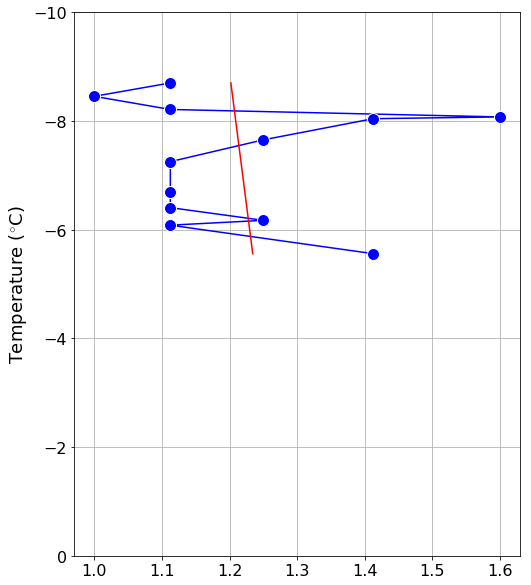

In [17]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(Dmm_pf2[finiteIx_pf2],pf2_temp[finiteIx_pf2],'b-')
ax.plot(Dmm_pf2[finiteIx_pf2],pf2_temp[finiteIx_pf2],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)
ax.plot(pf_Dmm_pf2(pf2_temp[finiteIx_pf2]),pf2_temp[finiteIx_pf2],'r-')

ax.set_ylim(-10,0)
ax.invert_yaxis()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(which='both')

In [4]:
pf1_temp = pf1['tempC'][pf1['tempC'] <= 0]
Nt_pf1 = pf1['Nt'][pf1['tempC'] <= 0]
finiteIx_pf1 = np.isfinite(np.log10(Nt_pf1))
pf_Nt_pf1 = np.poly1d(np.polyfit(pf1_temp[finiteIx_pf1],np.log10(Nt_pf1[finiteIx_pf1]),  1))
Nt_pf1_dT = 1 - (10**pf_Nt_pf1(-6)/10**pf_Nt_pf1(-5))
        
print(Nt_pf1_dT)

0.3505182543832218


In [27]:
pf1_temp = pf1['tempC'][(pf1['tempC'] <= -3) & (pf1['tempC'] >= -7.7)]
Nt_pf1 = pf1['Nt'][(pf1['tempC'] <= -3) & (pf1['tempC'] >= -7.7)]
finiteIx_pf1 = np.isfinite(np.log10(Nt_pf1))
pf_Nt_pf1 = np.poly1d(np.polyfit(pf1_temp[finiteIx_pf1],np.log10(Nt_pf1[finiteIx_pf1]),  1))
Nt_pf1_dT = 1 - (10**pf_Nt_pf1(-6)/10**pf_Nt_pf1(-5))
        
print(Nt_pf1_dT)

0.17690366173886496


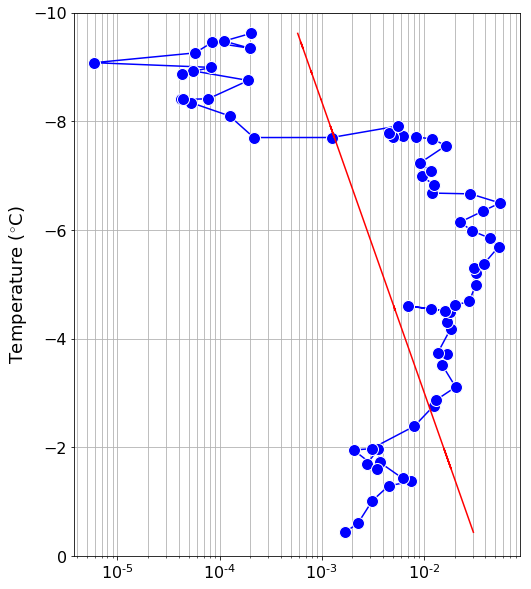

In [5]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(Nt_pf1[finiteIx_pf1],pf1_temp[finiteIx_pf1],'b-')
ax.plot(Nt_pf1[finiteIx_pf1],pf1_temp[finiteIx_pf1],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)
ax.plot(10**(pf_Nt_pf1(pf1_temp[finiteIx_pf1])),pf1_temp[finiteIx_pf1],'r-')

ax.set_ylim(-10,0)
ax.set_xscale('log',nonposx='mask')
ax.invert_yaxis()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(which='both')

In [6]:
pf2_temp = pf2['tempC'][pf2['tempC'] <= 0]
Nt_pf2 = pf2['Nt'][pf2['tempC'] <= 0]
finiteIx_pf2 = np.isfinite(np.log10(Nt_pf2))
pf_Nt_pf2 = np.poly1d(np.polyfit(pf2_temp[finiteIx_pf2],np.log10(Nt_pf2[finiteIx_pf2]),  1))
Nt_pf2_dT = 1 - (10**pf_Nt_pf2(-6)/10**pf_Nt_pf2(-5))
        
print(Nt_pf2_dT)

0.17926551740473973


In [29]:
pf2_temp = pf2['tempC'][(pf2['tempC'] <= -3) & (pf2['tempC'] >= -8)]
Nt_pf2 = pf2['Nt'][(pf2['tempC'] <= -3) & (pf2['tempC'] >= -8)]
finiteIx_pf2 = np.isfinite(np.log10(Nt_pf2))
pf_Nt_pf2 = np.poly1d(np.polyfit(pf2_temp[finiteIx_pf2],np.log10(Nt_pf2[finiteIx_pf2]),  1))
Nt_pf2_dT = 1 - (10**pf_Nt_pf2(-6)/10**pf_Nt_pf2(-5))
        
print(Nt_pf2_dT)

0.27903240818013764


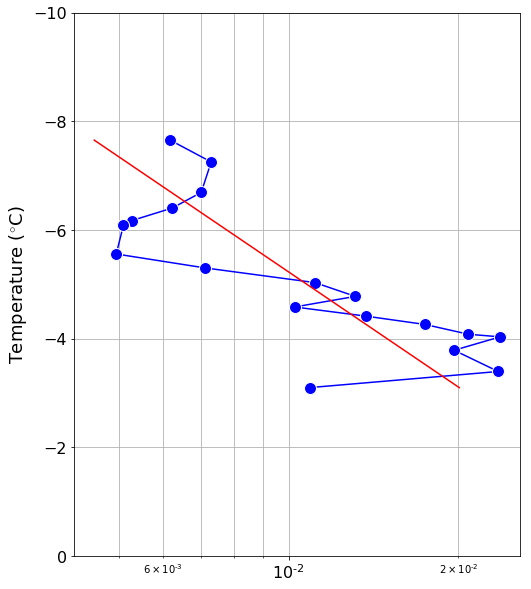

In [30]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(Nt_pf2[finiteIx_pf2],pf2_temp[finiteIx_pf2],'b-')
ax.plot(Nt_pf2[finiteIx_pf2],pf2_temp[finiteIx_pf2],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)
ax.plot(10**(pf_Nt_pf2(pf2_temp[finiteIx_pf2])),pf2_temp[finiteIx_pf2],'r-')

ax.set_ylim(-10,0)
ax.set_xscale('log',nonposx='mask')
ax.invert_yaxis()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(which='both')

In [7]:
pf1_temp = pf1['tempC'][pf1['tempC'] <= 0]
twc_pf1 = pf1['twc'][pf1['tempC'] <= 0]
finiteIx_pf1 = np.isfinite(np.log10(twc_pf1))
pf_twc_pf1 = np.poly1d(np.polyfit(pf1_temp[finiteIx_pf1],np.log10(twc_pf1[finiteIx_pf1]),  1))
twc_pf1_dT = 1 - (10**pf_twc_pf1(-6)/10**pf_twc_pf1(-5))
        
print(twc_pf1_dT)

0.3868639290341105


In [31]:
pf1_temp = pf1['tempC'][(pf1['tempC'] <= -3) & (pf1['tempC'] >= -7.7)]
twc_pf1 = pf1['twc'][(pf1['tempC'] <= -3) & (pf1['tempC'] >= -7.7)]
finiteIx_pf1 = np.isfinite(np.log10(twc_pf1))
pf_twc_pf1 = np.poly1d(np.polyfit(pf1_temp[finiteIx_pf1],np.log10(twc_pf1[finiteIx_pf1]),  1))
twc_pf1_dT = 1 - (10**pf_twc_pf1(-6)/10**pf_twc_pf1(-5))
        
print(twc_pf1_dT)

0.2059343460374058


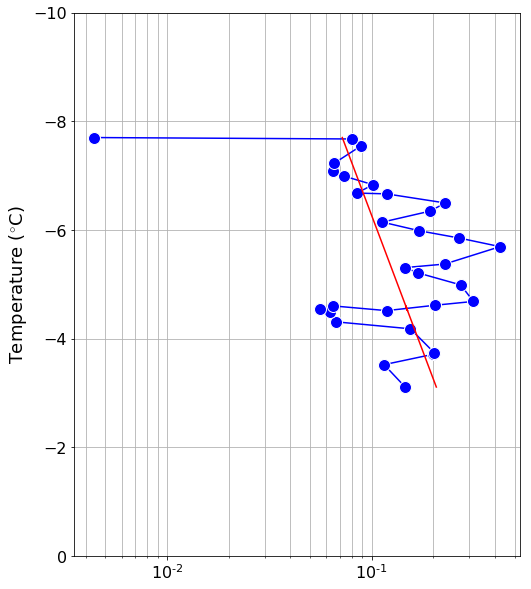

In [32]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(twc_pf1[finiteIx_pf1],pf1_temp[finiteIx_pf1],'b-')
ax.plot(twc_pf1[finiteIx_pf1],pf1_temp[finiteIx_pf1],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)
ax.plot(10**(pf_twc_pf1(pf1_temp[finiteIx_pf1])),pf1_temp[finiteIx_pf1],'r-')

ax.set_ylim(-10,0)
ax.set_xscale('log',nonposx='mask')
ax.invert_yaxis()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(which='both')

In [9]:
pf2_temp = pf2['tempC'][pf2['tempC'] <= 0]
twc_pf2 = pf2['twc'][pf2['tempC'] <= 0]
finiteIx_pf2 = np.isfinite(np.log10(twc_pf2))
pf_twc_pf2 = np.poly1d(np.polyfit(pf2_temp[finiteIx_pf2],np.log10(twc_pf2[finiteIx_pf2]),  1))
twc_pf2_dT = 1 - (10**pf_twc_pf2(-6)/10**pf_twc_pf2(-5))
        
print(twc_pf2_dT)

0.06244524378263461


In [51]:
pf2_temp = pf2['tempC'][(pf2['tempC'] <= -5) & (pf2['tempC'] >= -8.5)]
twc_pf2 = pf2['twc'][(pf2['tempC'] <= -5) & (pf2['tempC'] >= -8.5)]
finiteIx_pf2 = np.isfinite(np.log10(twc_pf2))
pf_twc_pf2 = np.poly1d(np.polyfit(pf2_temp[finiteIx_pf2],np.log10(twc_pf2[finiteIx_pf2]),  1))
twc_pf2_dT = 1 - (10**pf_twc_pf2(-6)/10**pf_twc_pf2(-5))
        
print(twc_pf2_dT)

0.12175743364983216


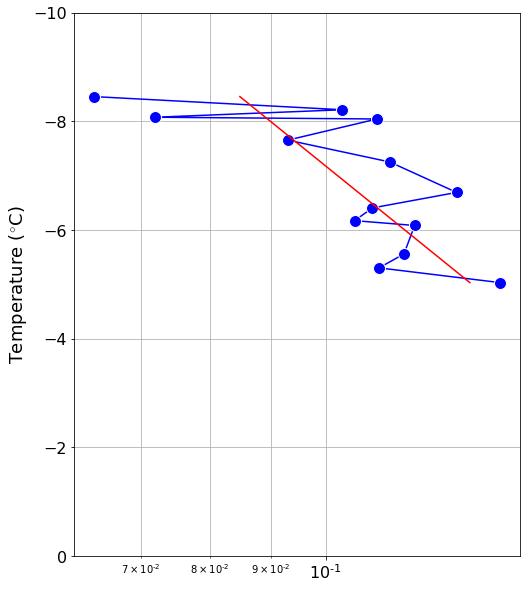

In [52]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(twc_pf2[finiteIx_pf2],pf2_temp[finiteIx_pf2],'b-')
ax.plot(twc_pf2[finiteIx_pf2],pf2_temp[finiteIx_pf2],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)
ax.plot(10**(pf_twc_pf2(pf2_temp[finiteIx_pf2])),pf2_temp[finiteIx_pf2],'r-')

ax.set_ylim(-10,0)
ax.set_xscale('log',nonposx='mask')
ax.invert_yaxis()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(which='both')